The Perceptron!
---

We study this algorithm for historical reasons and because its name is awesome.

Recall from lecture that it is the following greedy algorithm:
$$ \theta^{(t+1)} = \theta^{(t)} + \alpha \left(y^{(i)} - h_{\theta}(x^{(i)})\right)$$

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import time

In [2]:
X = np.zeros( (6,2) )
X[:,1] = 1
for i in range(6): X[i,0] = i+1
X
Y = np.zeros( 6 )
for i in range(6): Y[i] = 0 if i < 3 else 1
(X,Y)

(array([[1., 1.],
        [2., 1.],
        [3., 1.],
        [4., 1.],
        [5., 1.],
        [6., 1.]]), array([0., 0., 0., 1., 1., 1.]))

<IPython.core.display.Javascript object>


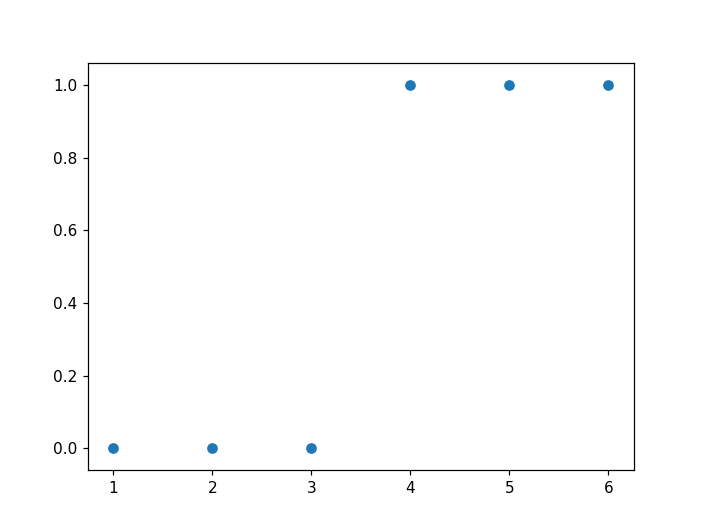

In [3]:
plt.scatter(X[:,0], Y)
plt.show()

Update Rule
---
The update rule for perceptrons! So simple! So wow!

In [4]:
def update(x,y,theta, alpha=1e-1):
    prediction = 1 if np.dot(theta,x) > 0 else 0
    return theta + alpha*(y - prediction)*x

In [5]:
def render_thetas(X, Y, thetas, points):
    fig, ax = plt.subplots()
    xx = np.arange(1,6, 0.1)

    def animate(i):
        theta = thetas[i]
        yy = theta[0]*xx + theta[1]
        ax.clear()
        ax.set_title("Iteration {i} Example is point {points[i][0]}")
        ax.plot(xx,yy)
        ax.scatter(X[:,0], Y)
        ax.scatter(X[:,0],np.array(X@theta > 0, dtype=np.float))
        time.sleep(1)
        return ax
    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(thetas), repeat=False)
    return ani

<IPython.core.display.Javascript object>


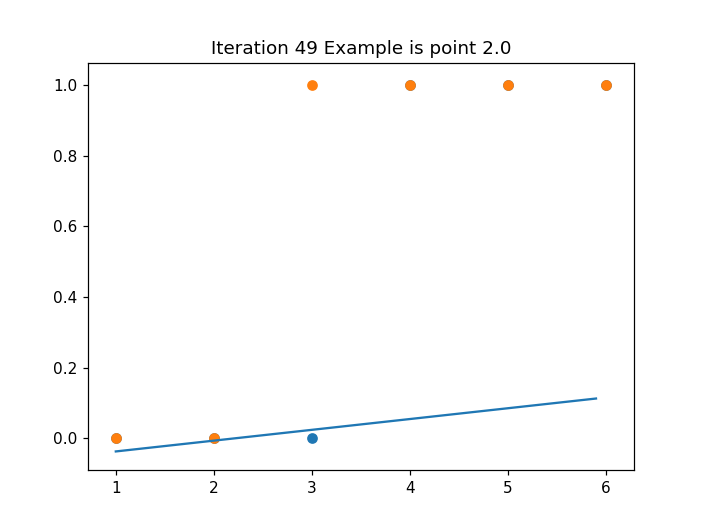

In [6]:
def build_thetas(X,Y):
    theta = 1e-2*np.random.randn( 2 )
    thetas = []
    points = []
    for i in range(50):
        idx = i % X.shape[0]
        theta = update(X[idx,:], Y[idx], theta, alpha=1e-2)
        points.append(X[idx])
        thetas.append(theta)
    return (thetas, points)
thetas, points = build_thetas(X,Y)
render_thetas(X, Y, thetas, points)

Noisy data
---
The perceptron will converge a perfect (linear) separator and it handles our "far away" sample problem... but what happens when there isn't one?!

<IPython.core.display.Javascript object>


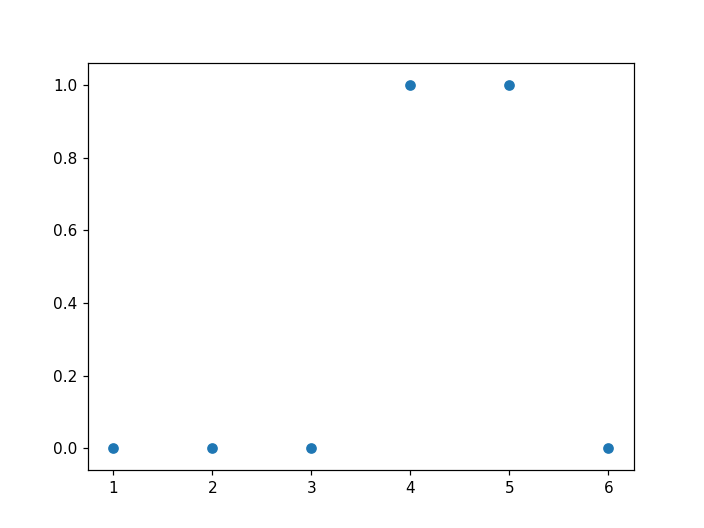

In [7]:
Y2 = np.zeros( 6 )
for i in range(6): Y2[i] = 0 if i < 3 or i == 5 else 1
fig, ax = plt.subplots()
ax.scatter(X[:,0], Y2)
plt.show()

What do you think happens now?!?

<IPython.core.display.Javascript object>


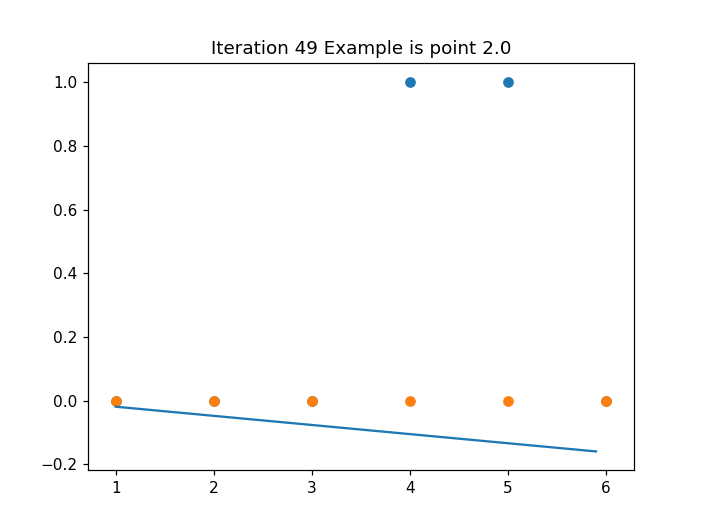

In [8]:
thetas2, points2 = build_thetas(X,Y2)
render_thetas(X, Y2, thetas2, points2)

Comments
---
* That it doesn't get a perfect answer isn't troubling: our linear class can't be perfect on these points! (Although historically, this was quite troubling! Took until the 80s to clear this up.)

* What is troubling is that it jumps around forever is slightly concerning. Broadly writ, we'll take the view that this is noise in our data, and we'll talk more about how to handl this next..